# Decision Tree Regression With Hyper Parameter Tuning

https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

In [3]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("./Real_Combine.csv")
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1092 non-null   float64
 1   TM      1092 non-null   float64
 2   Tm      1092 non-null   float64
 3   SLP     1092 non-null   float64
 4   H       1092 non-null   float64
 5   VV      1092 non-null   float64
 6   V       1092 non-null   float64
 7   VM      1092 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 85.3 KB


- T == Average Temperature (°C)
- TM == Maximum temperature (°C)
- Tm == Minimum temperature (°C)
- SLP == Atmospheric pressure at sea level (hPa)
- H == Average relative humidity (%)
- VV == Average visibility (Km)
- V == Average wind speed (Km/h)
- VM == Maximum sustained wind speed (Km/h)
- PM2.5== Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high

<AxesSubplot:>

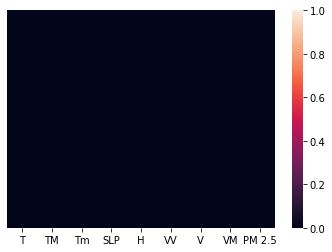

In [5]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False)

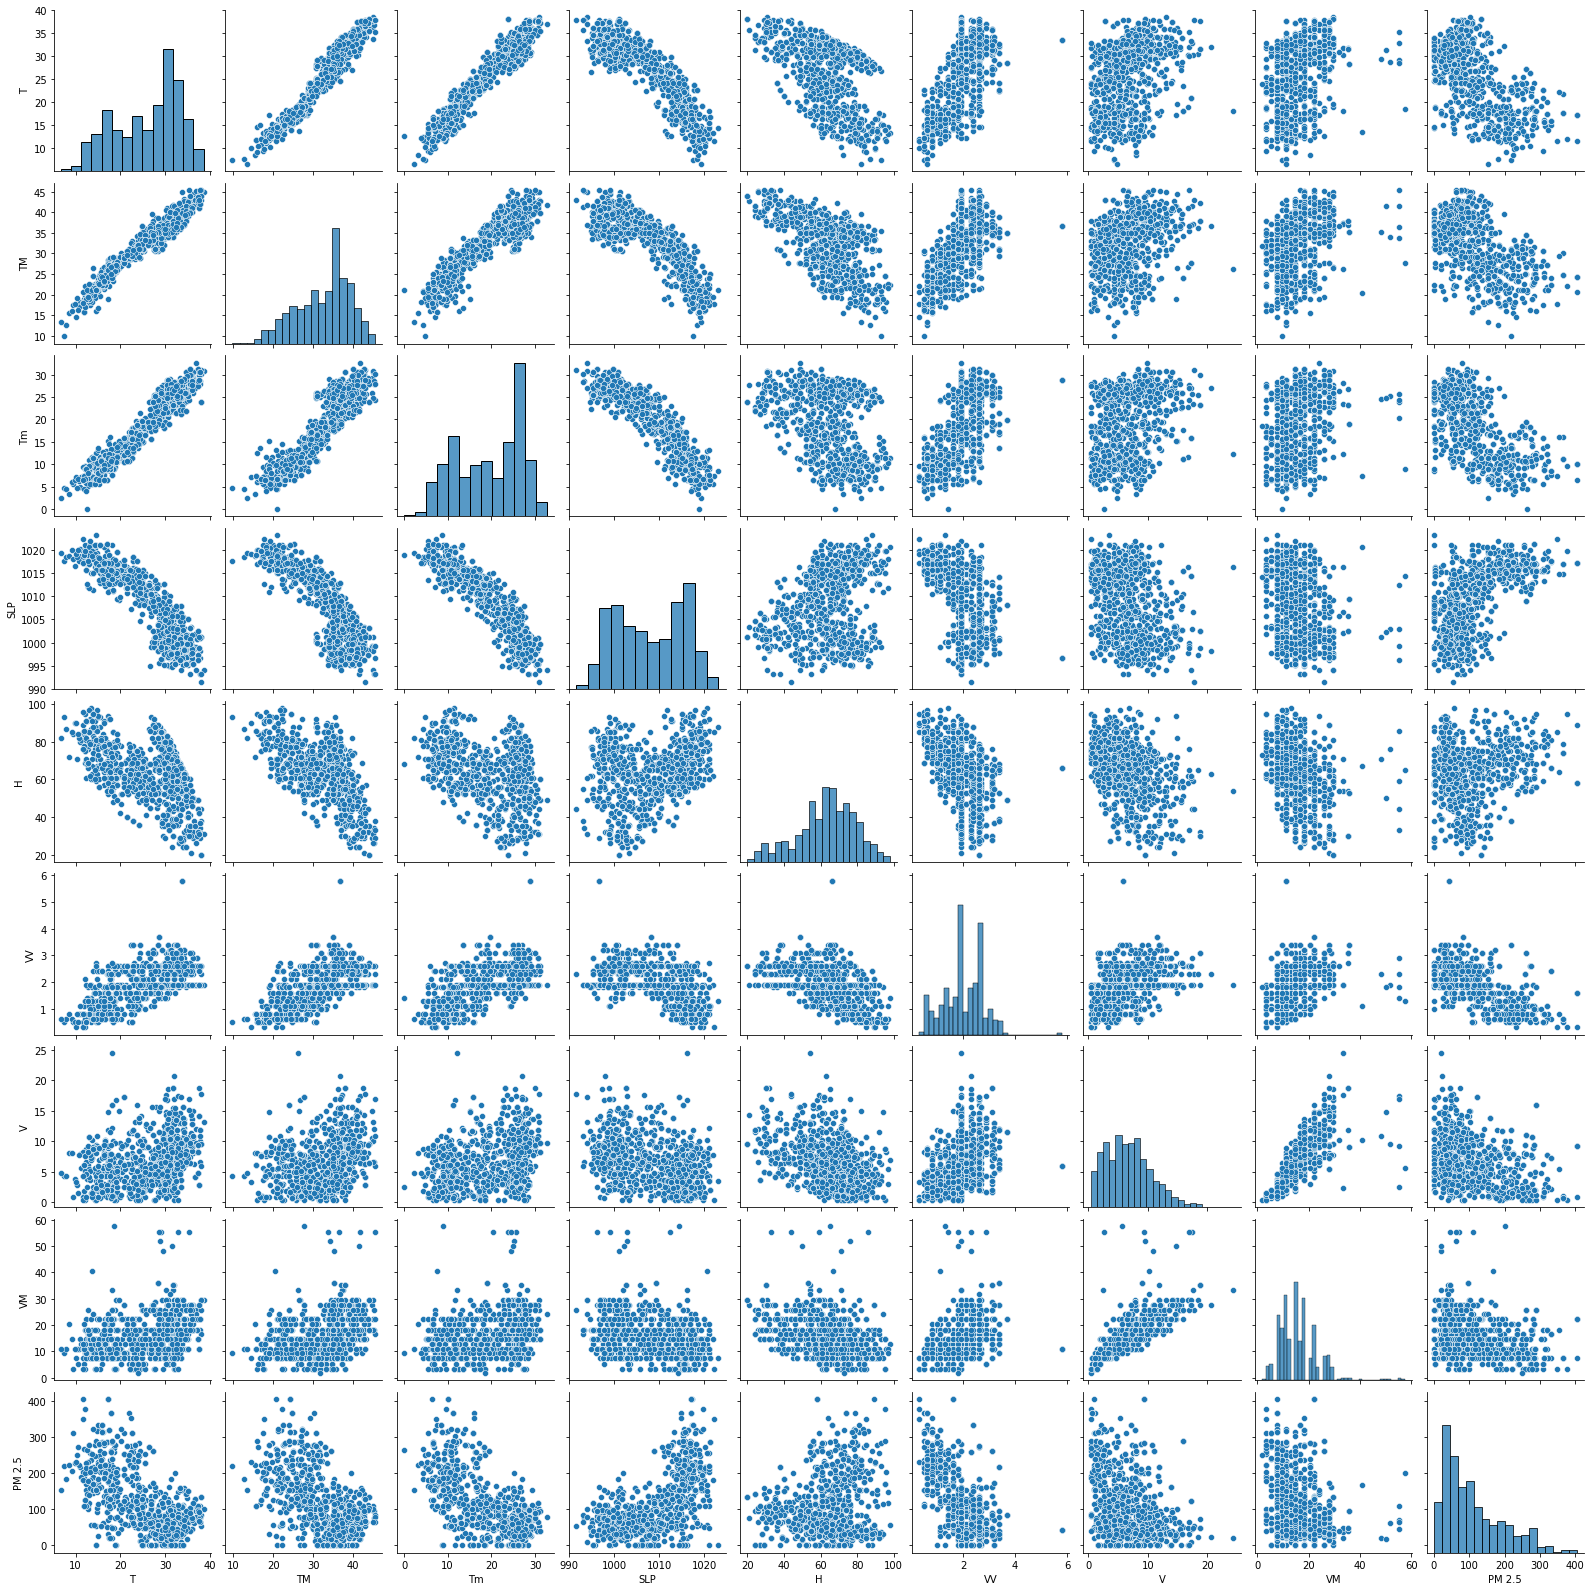

In [6]:
sns.pairplot(data)

In [7]:
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967570,0.953703,-0.881698,-0.510593,0.640738,0.302349,0.288292,-0.631462
TM,0.967570,1.000000,0.891970,-0.823447,-0.588017,0.606746,0.293309,0.297590,-0.568409
Tm,0.953703,0.891970,1.000000,-0.917557,-0.288647,0.577382,0.296546,0.267249,-0.673824
SLP,-0.881698,-0.823447,-0.917557,1.000000,0.242307,-0.518015,-0.330155,-0.311231,0.623187
H,-0.510593,-0.588017,-0.288647,0.242307,1.000000,-0.465514,-0.380805,-0.362632,0.138005
VV,0.640738,0.606746,0.577382,-0.518015,-0.465514,1.000000,0.377029,0.342650,-0.573941
V,0.302349,0.293309,0.296546,-0.330155,-0.380805,0.377029,1.000000,0.775715,-0.268530
VM,0.288292,0.297590,0.267249,-0.311231,-0.362632,0.342650,0.775715,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


## Feature selection

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1],
    data.iloc[:,-1],
    test_size=0.3,
    random_state=0)

<AxesSubplot:>

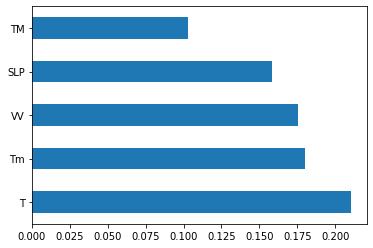

In [31]:
reg = ExtraTreesRegressor()
reg.fit(X_train, y_train)

feat_importance = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importance.nlargest().plot(kind='barh')

In [37]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model = DecisionTreeRegressor()

reg_decision_model.fit(X_train, y_train)
reg_decision_model.score(X_test, y_test)
# reg_decision_model.score(X_train, y_train)

0.6764340023697637

In [41]:
# Tuning of model

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,scoring='neg_mean_squared_error',verbose=3)
tuning_model.fit(X_train, y_train)

[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-4570.347 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-7807.472 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-7086.433 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-7479.986 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-6308.847 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-4435.881 total time=   0.0s
[C

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf mus

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [43]:
tuning_model.best_params_
tuning_model.best_score_

-2951.109929106503

In [45]:
tuning_model.best_estimator_.score(X_test, y_test)

0.5390201821370543